# Spam Ham Detection Using BERT and Tensorflow

### <u>Project Summary</u>

### <u>GitHub Link</u>
[Click Here](https://github.com/ajitmane36/spam-ham-detection-bert-tensorflow.git)

### <u>Problem Statement</u>

- The data is related to the classification of emails into spam or ham (non-spam). The goal of this project is to develop a model using BERT and TensorFlow to predict whether an email is spam or not based on its content. By fine-tuning a pre-trained BERT model, the objective is to enhance the accuracy and efficiency of email classification, ensuring that legitimate emails are delivered to the inbox while spam is effectively filtered out.

### <u>Data Description</u>

- **Message**: Description of the email content (text).
- **Category**: Indicates whether the email is spam (1) or not (0).

In [118]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# filter warnings
import warnings
warnings.filterwarnings('ignore')

In [156]:
# Dataset Loading
df=pd.read_csv(r"C:\Users\ajitm\Downloads\DS Projects\Deep Larning Projects\1. Text Classification Using BERT & Tensorflow\spam_emails_data.csv")
df

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [158]:
# Fist five observations
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [160]:
# Last five observations
df.tail()

,Category,Message
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...
5571,ham,Rofl. Its true to its name


#### <u>Data Inispection</u>

In [163]:
# Shape of dataset
df.shape
print(f'Dataset has {df.shape[0]} observations and {df.shape[1]} columns.')

Dataset has 5572 observations and 2 columns.


In [165]:
# Dataset columns
print(df.columns.tolist())

['Category', 'Message']


In [167]:
# Basic information of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [169]:
# Basic description of dataset
df.groupby('Category').describe()

Message                                                            \
           count unique                                                top   
Category                                                                     
ham         4825   4516                             Sorry, I'll call later   
spam         747    641  Please call our customer service representativ...   

               
         freq  
Category       
ham        30  
spam        4

- Dataset having 4825 Ham observations and 747 spam observations.
- Class imbalance seen.

#### <u>Data Wrangling</u>

In [172]:
# Cehcking  duplicates value in each feature
duplicates_df=pd.DataFrame({'columns':df.columns, 'number_of_duplicates': df.duplicated().sum()}).sort_values(by='number_of_duplicates', ascending=False)
print(duplicates_df)
print(f'Dataset having {df.duplicated().sum()} duplicates values.')

    columns  number_of_duplicates
0  Category                   415
1   Message                   415
Dataset having 415 duplicates values.


In [174]:
# Removing duplicates
df.drop_duplicates(inplace=True)
df.shape

(5157, 2)

In [176]:
# Checking missing values
null_df=pd.DataFrame({'columns': df.columns, 'num_of_nulls': df.isna().sum()})
print(null_df )
print(f'Dataset have {df.isna().sum()} null values.')

           columns  num_of_nulls
Category  Category             0
Message    Message             0
Dataset have Category    0
Message     0
dtype: int64 null values.


#### <u>Exploratory Data Analysis</u>

In [261]:
# Min and Max length of email
print("Smallest email")
print('__'*50)
print(df.Message.min())
print(f'Length: {len(df.Message.min())}')
print('=='*50)
print("Largest email")
print('__'*50)
print(df.Message.max())
print(f'Length: {len(df.Message.max())}')

Smallest email
____________________________________________________________________________________________________
#ERROR!
Length: 7
Largest email
____________________________________________________________________________________________________
… we r stayin here an extra week, back next wed. How did we do in the rugby this weekend? Hi to and and , c u soon "
Length: 116


In [264]:
# Defining a function to Notate the percent count of each value on the bars
def annot_percent(axes):
    '''Takes axes as input and labels the percent count of each bar in a countplot'''
    for p in plot.patches:
        total = sum(p.get_height() for p in plot.patches)/100
        percent = round((p.get_height()/total),2)
        x = p.get_x() + p.get_width()/2
        y = p.get_height()
        plot.annotate(f'{percent}%', (x, y), ha='center', va='bottom')

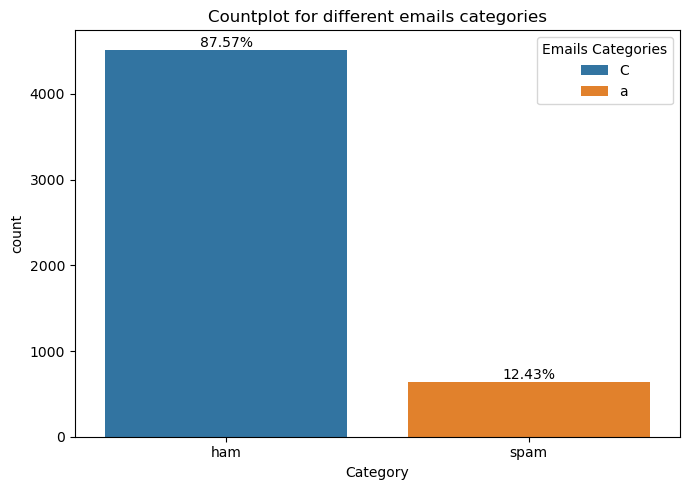

In [272]:
# Bar plot for diffrent categories of email 
plt.figure(figsize=(7,5))
plot=plt.subplot(111)
ax=sns.countplot(x=df.Category, hue=df.Category)
ax.set_title('Countplot for different emails categories')
ax.legend('Category', title='Emails Categories')
annot_percent(plot)
plt.tight_layout()
plt.show()